# Task
Demonstrate and compare image preprocessing techniques on a tensorflow image dataset. For each technique, provide its description, implement it, visualize its effects on sample images (before and after)

\## Load and Prepare tensorflow Image Dataset

### Subtask:
Load a suitable tenorflow image dataset and perform any initial setup required for the chosen deep learning framework.


In [ ]:
pip install tensorflow-datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the tf_flowers dataset as an alternative
dataset_name = "tf_flowers"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'], # Splitting the 'train' split into train and test
    shuffle_files=True,
    as_supervised=False, # We want the full dictionary including 'image' and 'label'
    with_info=True,
    data_dir='./data' # Specify a local directory for download
)

print(f"Successfully loaded the {dataset_name} dataset.")
print("Dataset info:")
print(ds_info)

print("\nFirst 5 elements of the training dataset:")
for i, example in enumerate(ds_train.take(5)):
    print(f"Example {i+1} keys: {example.keys()}")
    print(f"Image shape: {example['image'].shape}")
    print(f"Image dtype: {example['image'].dtype}")
    print(f"Label: {example['label'].numpy()}") # Assuming label is an integer tensor


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling data/tf_flowers/incomplete.9G8GAV_3.0.1/tf_flowers-train.tfrecord*...:   0%|          | 0/3670 [00:0…

Dataset tf_flowers downloaded and prepared to data/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Successfully loaded the tf_flowers dataset.
Dataset info:
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='data/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "htt

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Apply the preprocessing function to the datasets
# The dataset elements are currently dictionaries, so we need to extract image and label.
# For the tf_flowers dataset, 'image' and 'label' are the keys.

ds_train = ds_train.map(lambda x: preprocess_image(x['image'], x['label']), num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(lambda x: preprocess_image(x['image'], x['label']), num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch the datasets for efficiency
BATCH_SIZE = 32
ds_train = ds_train.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Image size set to: {IMG_WIDTH}x{IMG_HEIGHT}")
print(f"Batch size set to: {BATCH_SIZE}")

# Verify the preprocessed data
for image_batch, label_batch in ds_train.take(1):
    print(f"\nShape of a batch of images: {image_batch.shape}")
    print(f"Data type of a batch of images: {image_batch.dtype}")
    print(f"Min pixel value in a batch of images: {tf.reduce_min(image_batch).numpy()}")
    print(f"Max pixel value in a batch of images: {tf.reduce_max(image_batch).numpy()}")
    print(f"Shape of a batch of labels: {label_batch.shape}")
    print(f"Data type of a batch of labels: {label_batch.dtype}")

print("Dataset preprocessing (resize and normalization) complete.")

Image size set to: 224x224
Batch size set to: 32

Shape of a batch of images: (32, 224, 224, 3)
Data type of a batch of images: <dtype: 'float32'>
Min pixel value in a batch of images: 0.0
Max pixel value in a batch of images: 1.0
Shape of a batch of labels: (32,)
Data type of a batch of labels: <dtype: 'int64'>
Dataset preprocessing (resize and normalization) complete.


## Implement and Apply Preprocessing Techniques




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Extract a single sample image and its label from the preprocessed ds_train dataset
for sample_image_batch, sample_label_batch in ds_train.take(1):
    original_sample_image_tf = sample_image_batch[0] # Take the first image from the batch
    sample_label = sample_label_batch[0]
    break

# Convert image tensor to NumPy array
# This image is already float32 and in the range [0, 1] due to previous preprocessing
original_sample_image = original_sample_image_tf.numpy()

print(f"Original sample image shape: {original_sample_image.shape}")
print(f"Original sample image dtype: {original_sample_image.dtype}")
print(f"Original sample image min value: {np.min(original_sample_image)}")
print(f"Original sample image max value: {np.max(original_sample_image)}")
print(f"Sample label: {sample_label.numpy()}")

# 3. Initialize an empty dictionary to store processed images
processed_images = {
    'Original': original_sample_image
}

# 4. Resizing
target_size_resize = (100, 100)
resized_image = tf.image.resize(original_sample_image_tf, target_size_resize).numpy()
processed_images['Resizing'] = resized_image
print(f"Resizing: {resized_image.shape}")

# 5. Normalization (Pixel Scaling to [-1, 1])
normalized_image_neg1_1 = (original_sample_image * 2) - 1
processed_images['Normalization'] = normalized_image_neg1_1
print(f"Normalization ([-1, 1]): min={np.min(normalized_image_neg1_1)}, max={np.max(normalized_image_neg1_1)}")

# 6. Grayscale Conversion
grayscale_image_tf = tf.image.rgb_to_grayscale(original_sample_image_tf)
grayscale_image = grayscale_image_tf.numpy()
processed_images['Grayscale'] = grayscale_image
print(f"Grayscale: {grayscale_image.shape}")

# 7. Data Augmentation (Rotation)
rotated_image_tf = tf.image.rot90(original_sample_image_tf, k=1) # Rotate 90 degrees counter-clockwise
rotated_image = rotated_image_tf.numpy()
processed_images['Rotation'] = rotated_image
print(f"Rotation: {rotated_image.shape}")

# 8. Data Augmentation (Flipping)
flipped_image_tf = tf.image.flip_left_right(original_sample_image_tf)
flipped_image = flipped_image_tf.numpy()
processed_images['Flipping'] = flipped_image
print(f"Flipping: {flipped_image.shape}")

# 9. Color Jittering
# Ensure the image is float32 for these operations
color_jittered_image_tf = tf.image.random_brightness(original_sample_image_tf, max_delta=0.2)
color_jittered_image_tf = tf.image.random_contrast(color_jittered_image_tf, lower=0.8, upper=1.2)
color_jittered_image_tf = tf.image.random_saturation(color_jittered_image_tf, lower=0.8, upper=1.2)
color_jittered_image_tf = tf.image.random_hue(color_jittered_image_tf, max_delta=0.1)
color_jittered_image = color_jittered_image_tf.numpy()
processed_images['Color Jittering'] = color_jittered_image
print(f"Color Jittering: {color_jittered_image.shape}")

# 10. Padding
original_height, original_width, _ = original_sample_image.shape
target_height_pad = original_height + 32 # Add 16 pixels top/bottom
target_width_pad = original_width + 32 # Add 16 pixels left/right

offset_height = (target_height_pad - original_height) // 2
offset_width = (target_width_pad - original_width) // 2

padded_image_tf = tf.image.pad_to_bounding_box(
    original_sample_image_tf,
    offset_height=offset_height,
    offset_width=offset_width,
    target_height=target_height_pad,
    target_width=target_width_pad
)
padded_image = padded_image_tf.numpy()
processed_images['Padding'] = padded_image
print(f"Padding: {padded_image.shape}")

# 11. Blurring (Gaussian Blur)
# Convert from [0, 1] float32 to [0, 255] uint8 for OpenCV
image_uint8_blur = (original_sample_image * 255).astype(np.uint8)
blurred_image_cv = cv2.GaussianBlur(image_uint8_blur, (5, 5), 0)
# Convert back to float32 [0, 1] for consistency
blurred_image = blurred_image_cv.astype(np.float32) / 255.0
processed_images['Blurring'] = blurred_image
print(f"Blurring: {blurred_image.shape}")

# 12. Edge Detection (Canny)
# Convert from [0, 1] float32 to [0, 255] uint8 for OpenCV
image_uint8_canny = (original_sample_image * 255).astype(np.uint8)
# Convert to grayscale for Canny edge detection
gray_image_cv = cv2.cvtColor(image_uint8_canny, cv2.COLOR_RGB2GRAY)
# Apply Canny edge detector
edged_image_cv = cv2.Canny(gray_image_cv, 100, 200)
# Canny output is single channel, convert to float32 [0, 1]
edged_image = edged_image_cv.astype(np.float32) / 255.0
# For visualization later, it might be good to have 3 channels, so stack it
edged_image_3ch = np.stack([edged_image, edged_image, edged_image], axis=-1)
processed_images['Edge Detection'] = edged_image_3ch
print(f"Edge Detection: {edged_image_3ch.shape}")

# 13. Print the keys of the processed_images dictionary
print("\nKeys of processed_images dictionary:")
for key, value in processed_images.items():
    print(f"- {key}: shape={value.shape}, dtype={value.dtype}, min={np.min(value):.2f}, max={np.max(value):.2f}")

Original sample image shape: (224, 224, 3)
Original sample image dtype: float32
Original sample image min value: 0.0
Original sample image max value: 1.0
Sample label: 2
Resizing: (100, 100, 3)
Normalization ([-1, 1]): min=-1.0, max=1.0
Grayscale: (224, 224, 1)
Rotation: (224, 224, 3)
Flipping: (224, 224, 3)
Color Jittering: (224, 224, 3)
Padding: (256, 256, 3)
Blurring: (224, 224, 3)
Edge Detection: (224, 224, 3)

Keys of processed_images dictionary:
- Original: shape=(224, 224, 3), dtype=float32, min=0.00, max=1.00
- Resizing: shape=(100, 100, 3), dtype=float32, min=0.00, max=1.00
- Normalization: shape=(224, 224, 3), dtype=float32, min=-1.00, max=1.00
- Grayscale: shape=(224, 224, 1), dtype=float32, min=0.05, max=0.99
- Rotation: shape=(224, 224, 3), dtype=float32, min=0.00, max=1.00
- Flipping: shape=(224, 224, 3), dtype=float32, min=0.00, max=1.00
- Color Jittering: shape=(224, 224, 3), dtype=float32, min=0.00, max=0.92
- Padding: shape=(256, 256, 3), dtype=float32, min=0.00, max=

## Visualize Preprocessing Effects



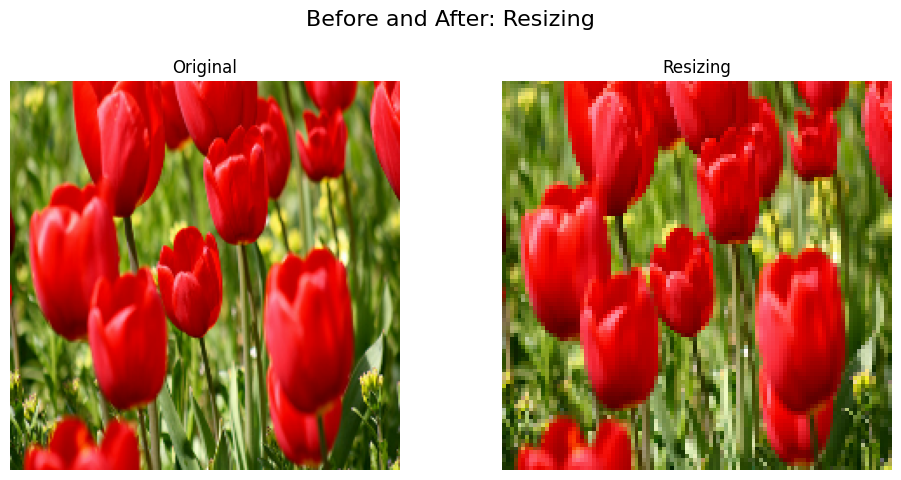

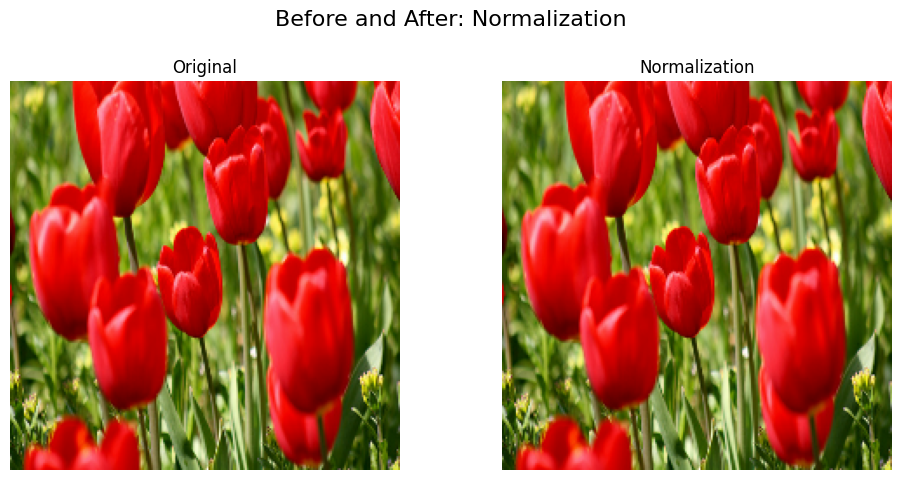

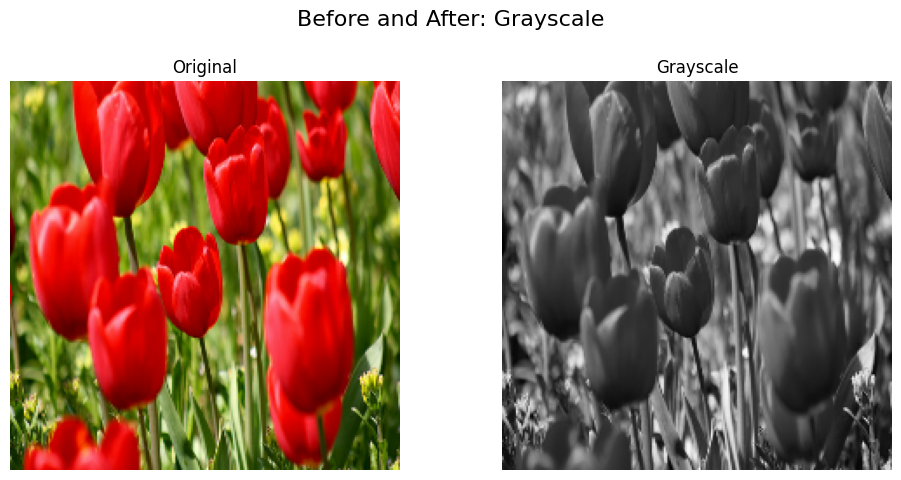

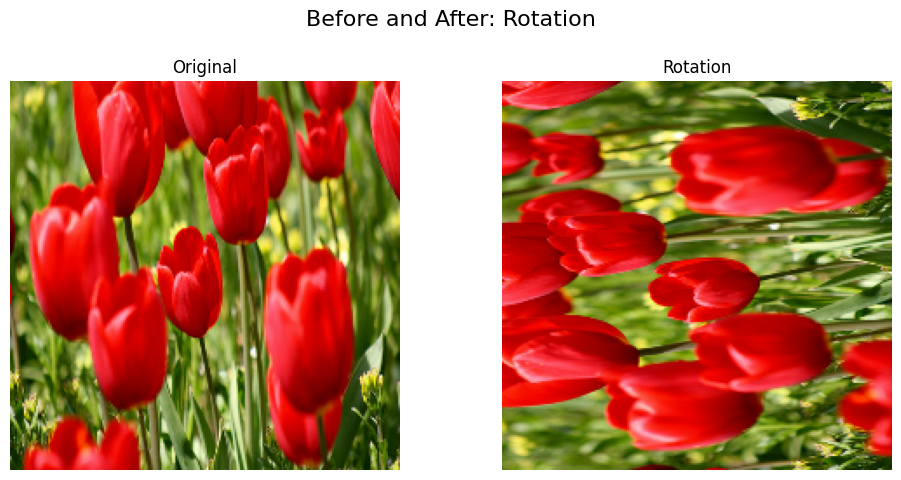

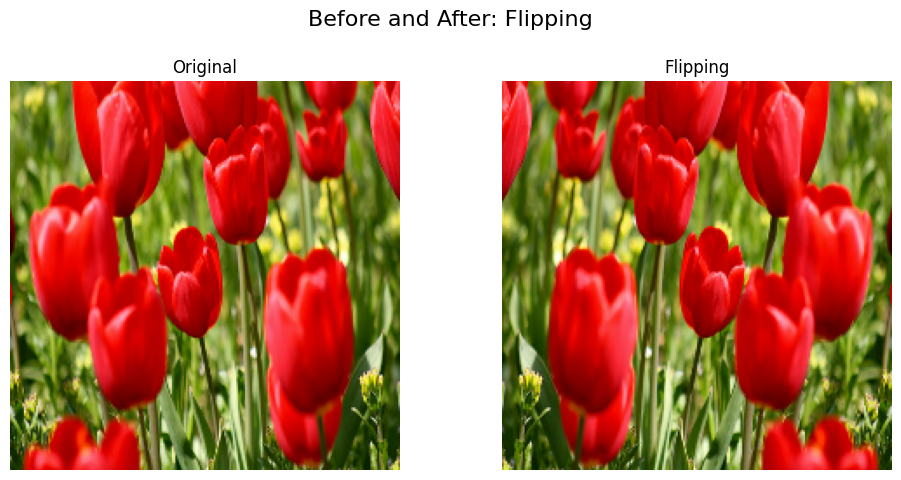

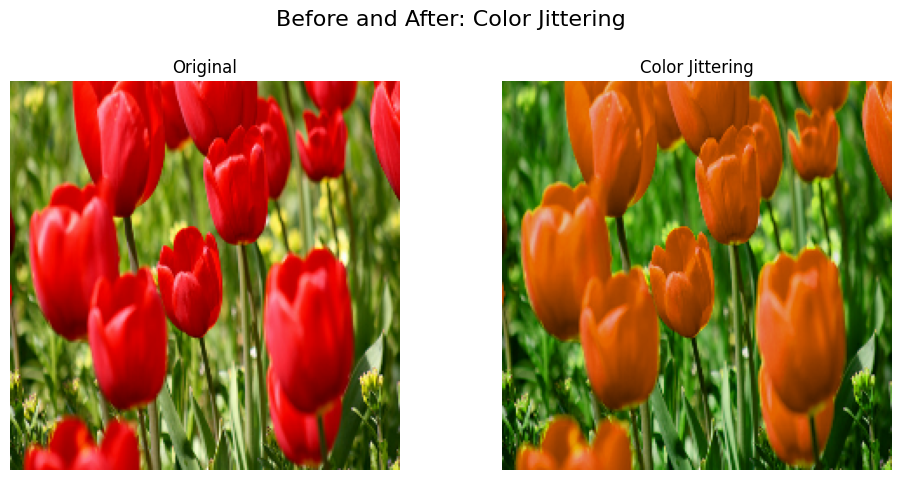

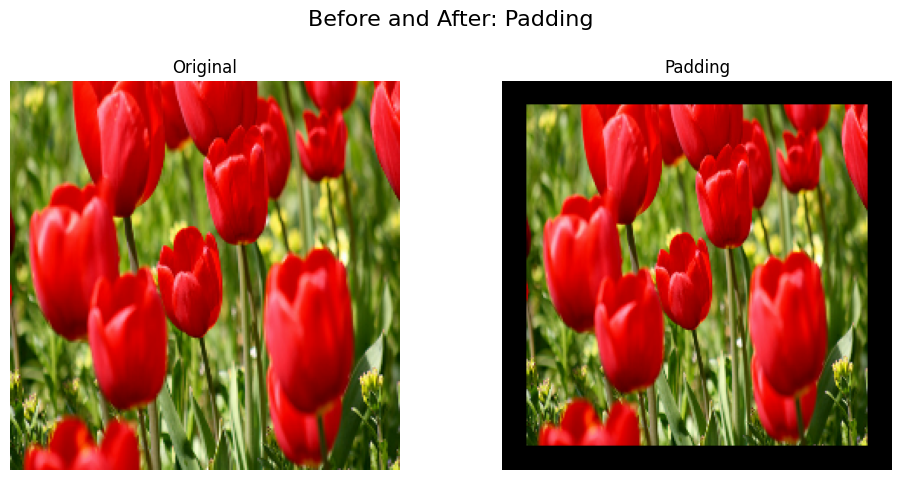

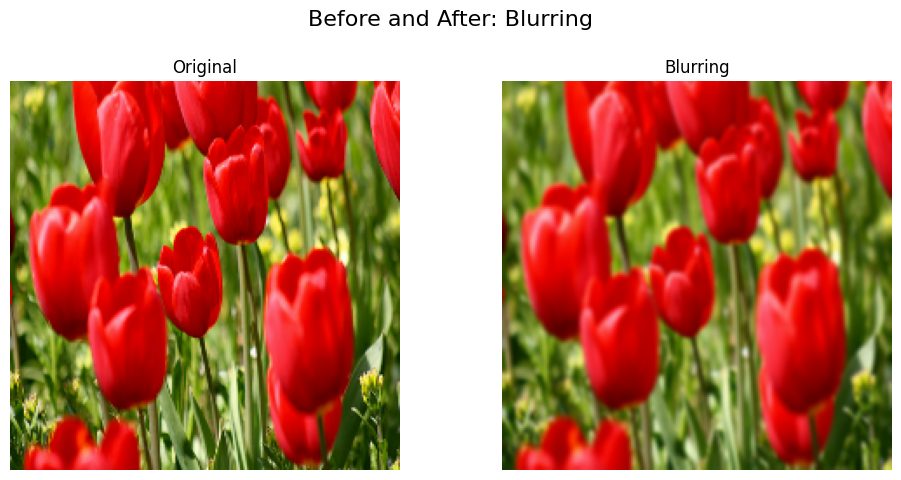

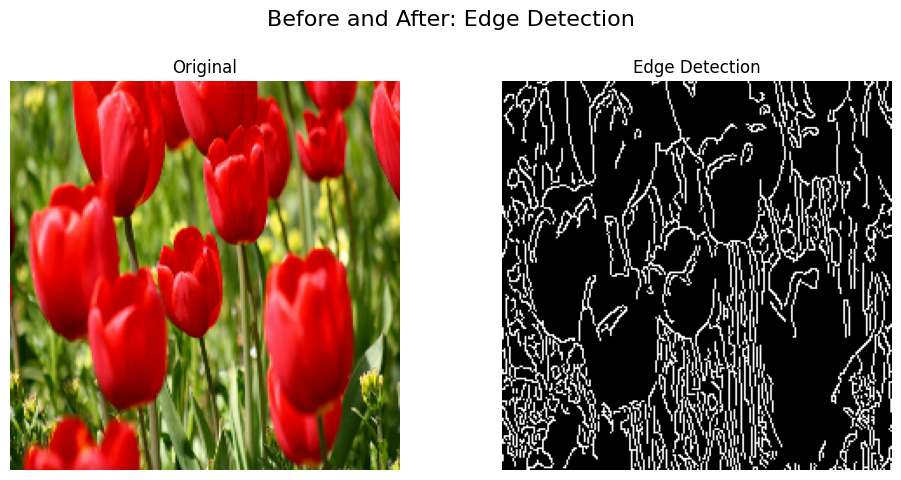

Visualization of preprocessing effects complete.


In [ ]:
for technique_name, processed_img in processed_images.items():
    if technique_name == 'Original':
        continue

    plt.figure(figsize=(10, 5))

    # Plot Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(processed_images['Original'])
    plt.title('Original')
    plt.axis('off')

    # Plot Processed Image
    plt.subplot(1, 2, 2)
    if processed_img.shape[-1] == 1:  # Handle grayscale images
        plt.imshow(processed_img.squeeze(), cmap='gray')
    elif technique_name == 'Normalization':
        # Normalization to [-1, 1] can cause issues with imshow directly.
        # Convert back to [0, 1] for visualization, assuming original was [0, 1].
        # This is for display purposes only, not altering the stored data.
        display_img = (processed_img + 1) / 2
        plt.imshow(display_img.clip(0, 1)) # Clip to ensure valid imshow range
    else:
        plt.imshow(processed_img)

    plt.title(technique_name)
    plt.axis('off')

    plt.suptitle(f'Before and After: {technique_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Visualization of preprocessing effects complete.")

## Comparative Table of Image Preprocessing Techniques

| Technique           | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Example Image (Before/After)                                                                                                                            | Key Observations                                                                                                                                                                                                                                                          |
| :------------------ | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Resizing**        | To normalize input image dimensions for a neural network. Many deep learning models require fixed-size inputs. Images are scaled up or down to a target width and height using interpolation methods (e.g., nearest-neighbor, bilinear, bicubic). This ensures all images in a batch have consistent dimensions before being fed into the model.                                                                                                                                   | Image resized from 224x224 to 100x100.                                                                                                                  | Reduces image dimensions, leading to loss of fine details but ensures consistent input size for models. The aspect ratio might change if not maintained.                                                                                                        |
| **Normalization**   | To transform pixel intensity values to a standard range (e.g., [0, 1] or [-1, 1]). This helps in stabilizing and accelerating model training by preventing large pixel values from dominating gradients. Typically, pixel values (which are often in the range [0, 255] for 8-bit images) are divided by 255 to scale them to [0, 1]. Another common method is mean subtraction and division by standard deviation to normalize to a distribution with zero mean and unit variance. | Pixel values scaled from [0, 1] to [-1, 1].                                                                                                             | Visually, the image pixel values are mapped to a new range. When displayed, a range like [-1, 1] might cause the image to appear altered (e.g., darker) if not handled, but the relative intensity differences are preserved. Primarily a numerical adjustment for model stability. |
| **Grayscale Conversion** | To reduce the dimensionality of the input data when color information is not crucial for the task, thereby decreasing computational load and memory usage. A weighted sum of the RGB channels is calculated to produce a single intensity value for each pixel. A common formula is `Gray = 0.2989*R + 0.5870*G + 0.1140*B`.                                                                                                                                  | Color image converted to a single-channel grayscale image.                                                                                              | Removes color information, resulting in a black and white image. Reduces data dimensionality, simplifying the visual representation to intensity only.                                                                                                      |
| **Rotation**        | To artificially expand the training dataset by creating modified versions of existing images. This helps in improving the model's generalization capabilities and reducing overfitting, especially when data is scarce. Images are rotated by a certain degree (e.g., -15 to +15 degrees).                                                                                                                                                                                           | Image rotated by 90 degrees counter-clockwise.                                                                                                          | Changes the orientation of the image, helping the model learn features invariant to rotation. Portions of the image might be cropped if not handled carefully.                                                                                                |
| **Flipping**        | To artificially expand the training dataset by creating modified versions of existing images. This helps in improving the model's generalization capabilities and reducing overfitting, especially when data is scarce. Images are flipped horizontally or vertically.                                                                                                                                                                                                           | Image horizontally flipped.                                                                                                                             | Creates a mirror image, aiding the model in recognizing objects regardless of their left-right orientation. Preserves content while changing spatial arrangement.                                                                                            |
| **Color Jittering** | To introduce random variations in color properties (brightness, contrast, saturation, hue) to make the model robust to different lighting conditions and color variations in real-world data. Random factors are applied to the brightness, contrast, saturation, and hue of an image. For example, brightness might be randomly scaled by a factor between 0.5 and 1.5.                                                                                                           | Image with randomly adjusted brightness, contrast, saturation, and hue.                                                                                 | Introduces subtle or noticeable color shifts, making the model more robust to varying lighting and color distributions. The image's overall tone and vibrancy change.                                                                                          |
| **Padding**         | To increase the spatial dimensions of an image, often used to preserve information at the borders during convolution or to ensure all images have identical dimensions before batching or processing. Pixels are added around the border of an image, typically with zero values (zero-padding), repeating boundary values, or mirroring existing values. This helps control the output size of convolutional layers.                                                              | Image padded with black pixels around its borders, increasing its dimensions from 224x224 to 256x256.                                                  | Increases image dimensions by adding a border (black in this case), useful for preserving spatial information after convolutions or standardizing input sizes. The original content remains unchanged but is surrounded by new pixels. |
| **Blurring**        | To reduce noise and fine details in an image, which can sometimes improve model focus on more prominent features and mitigate the impact of high-frequency noise. A convolution kernel (e.g., a Gaussian kernel) is applied to the image, averaging pixel values with their neighbors according to the kernel's weights. This effectively smooths out sharp edges and reduces noise.                                                                                                        | Image smoothed using a Gaussian filter.                                                                                                                 | Reduces sharpness and fine details, smoothing out textures and potentially mitigating noise, making the main features more prominent. Edges become less distinct.                                                                                   |
| **Edge Detection**  | To highlight structural features and boundaries within an image, which can be useful when object shape and contours are important for the task. Algorithms analyze intensity changes in pixels. For example, the Canny edge detector uses multiple stages: noise reduction (Gaussian blur), gradient calculation, non-maximum suppression, and hysteresis thresholding to identify strong and weak edges.                                                                          | Image transformed to highlight edges and boundaries.                                                                                                    | Extracts the outlines and structural features of objects, converting the image into a representation focusing on boundaries rather than textures or colors. Most color and texture information is removed, leaving only object outlines.       |